In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


# Explore the data

Shape of data: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

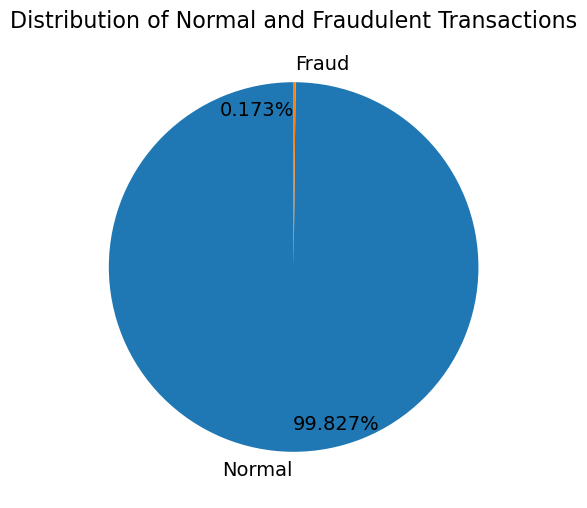

In [119]:
cc_data = pd.read_csv('creditcard.csv')
# Get the shape of the data. 
print("Shape of data:", cc_data.shape)
# See the first few lines of the data.
print(cc_data.head())

# Find the ratio of the fraudlent and normal cases.
print(cc_data['Class'].value_counts())
total = cc_data['Class'].value_counts().sum()
print("Precent of fraudulent transactions:", (cc_data['Class'].value_counts()[1]*100)/total)

import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "Class" is your column of interest
counts = cc_data['Class'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10,6))
patches, texts, autotexts = ax.pie(counts, labels=['Normal', 'Fraud'], autopct='%1.3f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center of pie to make it look like a donut
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# Increase the size of the text
plt.setp(texts, size=14)
plt.setp(autotexts, size=14)

# Move the percentages to the side
autotexts[0].set_horizontalalignment('left')
autotexts[1].set_horizontalalignment('right')

plt.title('Distribution of Normal and Fraudulent Transactions', size=16)
plt.show()

# Data preprocessing

In [120]:
# Check for any duplicates.
print("Number of duplicates:", len(cc_data[cc_data.duplicated()]))
cc_data_no_dups = cc_data.drop_duplicates()
print(cc_data_no_dups[cc_data_no_dups.duplicated()])
# Check for any null values.
print(cc_data_no_dups.isnull().sum())

Number of duplicates: 1081
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Modeling

In [121]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable

# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.1, random_state=12345)

print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())

Training set size: 255353
Test set size: 28373
Precentage of test dataset: 0.11111285162108923
Precent of fraudulent transactions for training: 0.14957497533417366
Precent of fraudulent transactionsfor testing: 0.016502403381939347
Class
0    254927
1       426
Name: count, dtype: int64
Class
0    28326
1       47
Name: count, dtype: int64


In [122]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Number of rows in x_train:", len(x_train))
print("Number of rows in y_train:",len(y_train))

print("Number of rows in x_train:", len(x_train_res))
print("Number of rows in y_train:",len(y_train_res))

Number of rows in x_train: 255353
Number of rows in y_train: 255353
Number of rows in x_train: 509854
Number of rows in y_train: 509854


## Gaussian NB

In [123]:
# Start the timer.
start = time.time()

# Create a Gaussian Naive Bayes classifier.
clf_nb = GaussianNB()

# Train the classifier.
clf_nb.fit(x_train_res, y_train_res)

# Predict the test set results.
y_pred = clf_nb.predict(x_test)

# Stop the timer and calculate the time it takes to run.
end = time.time()
print("Time taken for Naive Bayes: ", end - start, "seconds")

# Calculate the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print(cm)

# # Plot the confusion matrix.
# plt.figure()
# # sns.heatmap(cm, annot=True, fmt='d')
# ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})  # this sets the text size in the boxes
# ax.set_xlabel('Predicted', fontsize=14)  # this sets the x-axis label text size
# ax.set_ylabel('Truth', fontsize=14)
# ax.set_title('Confusion Matrix', fontsize=16)
# # plt.xlabel('Predicted')
# # plt.ylabel('Truth')
# plt.show()

# Calculate precision, recall, specificity, accuracy, and f-measure.
report = classification_report(y_test, y_pred, output_dict=True)
print('Precision: ', report['1']['precision'])
print('Recall: ', report['1']['recall'])
print('Specificity: ', report['0']['recall'])
print('Accuracy: ', report['accuracy'])
print('F-measure: ', f1_score(y_test, y_pred))
print('MCC: ', matthews_corrcoef(y_test, y_pred))


Time taken for Naive Bayes:  0.2018749713897705 seconds
[[28132   194]
 [   14    33]]
Precision:  0.14537444933920704
Recall:  0.7021276595744681
Specificity:  0.9931511685377392
Accuracy:  0.9926690868078807
F-measure:  0.2408759124087591
MCC:  0.3173798050417431


## Complement NB

In [124]:
def run_complement_naive_bayes(x_train, y_train, x_test, y_test):
    # Start the timer.
    start = time.time()

    # Create a Complement Naive Bayes classifier.
    clf_cnb = make_pipeline(MinMaxScaler(), ComplementNB())

    # Train the classifier with the scaled data.
    clf_cnb.fit(x_train, y_train)

    # Predict the test set results with the scaled data.
    y_pred = clf_cnb.predict(x_test)

    # Stop the timer and calculate the time it takes to run.
    end = time.time()
    print("Time taken for Complement Naive Bayes: ", end - start, "seconds")

    # Calculate the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Calculate precision, recall, specificity, accuracy, and f-measure.
    report = classification_report(y_test, y_pred, output_dict=True)
    print('Precision: ', report['1']['precision'])
    print('Recall: ', report['1']['recall'])
    print('Specificity: ', report['0']['recall'])
    print('Accuracy: ', report['accuracy'])
    print('F-measure: ', f1_score(y_test, y_pred))
    print('MCC: ', matthews_corrcoef(y_test, y_pred))

    return clf_cnb, y_pred


In [125]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.1, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_cnb_1, y_pred = run_complement_naive_bayes(x_train_res, y_train_res, x_test, y_test)

Training set size: 255353
Test set size: 28373
Precentage of test dataset: 0.11111285162108923
Precent of fraudulent transactions for training: 0.14957497533417366
Precent of fraudulent transactionsfor testing: 0.016502403381939347
Class
0    254927
1       426
Name: count, dtype: int64
Class
0    28326
1       47
Name: count, dtype: int64
Time taken for Complement Naive Bayes:  0.2097780704498291 seconds
[[28320     6]
 [   16    31]]
Precision:  0.8378378378378378
Recall:  0.6595744680851063
Specificity:  0.9997881804702393
Accuracy:  0.9992246149508336
F-measure:  0.7380952380952381
MCC:  0.7430118874496061


In [126]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.2, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_cnb_2, y_pred = run_complement_naive_bayes(x_train_res, y_train_res, x_test, y_test)

Training set size: 226980
Test set size: 56746
Precentage of test dataset: 0.25000440567450877
Precent of fraudulent transactions for training: 0.13272145698666113
Precent of fraudulent transactionsfor testing: 0.03335592172945188
Class
0    226602
1       378
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
Time taken for Complement Naive Bayes:  0.25493717193603516 seconds
[[56637    14]
 [   27    68]]
Precision:  0.8292682926829268
Recall:  0.7157894736842105
Specificity:  0.9997528728530829
Accuracy:  0.9992774821132767
F-measure:  0.768361581920904
MCC:  0.7700880658261138


In [127]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.5, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_cnb_5, y_pred = run_complement_naive_bayes(x_train_res, y_train_res, x_test, y_test)

Training set size: 141863
Test set size: 141863
Precentage of test dataset: 1.0
Precent of fraudulent transactions for training: 0.0832142468408431
Precent of fraudulent transactionsfor testing: 0.08286313187526992
Class
0    141626
1       237
Name: count, dtype: int64
Class
0    141627
1       236
Name: count, dtype: int64
Time taken for Complement Naive Bayes:  0.12999391555786133 seconds
[[141576     51]
 [    52    184]]
Precision:  0.7829787234042553
Recall:  0.7796610169491526
Specificity:  0.9996398991717681
Accuracy:  0.9992739473999563
F-measure:  0.7813163481953291
MCC:  0.7809544859201056


In [128]:
# # Create a MinMaxScaler
# # scaler = MinMaxScaler()

# # # Fit the scaler to the training data and transform it
# # x_train_res_scaled = scaler.fit_transform(x_train_res)

# # # Transform the test data using the fitted scaler
# # x_test_scaled = scaler.transform(x_test)

# # Start the timer.
# start = time.time()

# # Create a Complement Naive Bayes classifier.
# from sklearn.naive_bayes import ComplementNB
# clf_cnb = make_pipeline(MinMaxScaler(), ComplementNB(force_alpha=True))
# #clf_cnb = ComplementNB()

# # Train the classifier with the scaled data.
# clf_cnb.fit(x_train_res, y_train_res)

# # Predict the test set results with the scaled data.
# y_pred = clf_cnb.predict(x_test)

# # Stop the timer and calculate the time it takes to run.
# end = time.time()
# print("Time taken for Complement Naive Bayes: ", end - start, "seconds")

# # Calculate the confusion matrix.
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # # Plot the confusion matrix.
# # plt.figure(figsize=(8,6))
# # # sns.heatmap(cm, annot=True, fmt='d')
# # ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})  # this sets the text size in the boxes
# # ax.set_xlabel('Predicted', fontsize=14)  # this sets the x-axis label text size
# # ax.set_ylabel('Truth', fontsize=14)
# # ax.set_title('Confusion Matrix', fontsize=16)
# # # plt.xlabel('Predicted')
# # # plt.ylabel('Truth')
# # plt.show()

# # Calculate precision, recall, specificity, accuracy, and f-measure.
# report = classification_report(y_test, y_pred, output_dict=True)
# print('Precision: ', report['1']['precision'])
# print('Recall: ', report['1']['recall'])
# print('Specificity: ', report['0']['recall'])
# print('Accuracy: ', report['accuracy'])
# print('F-measure: ', f1_score(y_test, y_pred))
# print('MCC: ', matthews_corrcoef(y_test, y_pred))


# # Define the parameter grid
# # param_grid = {
# #     'complementnb__alpha': [0.1, 0.5, 1.0],  # adjust this to the range of alpha values you want to try
# #     'complementnb__norm': [False, True]  # adjust this to the values of norm you want to try
# # }

# # # Create a GridSearchCV object
# # grid_search = GridSearchCV(clf_cnb, param_grid, cv=5)

# # # Fit the GridSearchCV object to the data
# # grid_search.fit(x_train_res, y_train_res)

# # # Print the best parameters
# # print("Best parameters: ", grid_search.best_params_)

# # # Use the best estimator to make predictions
# # best_clf = grid_search.best_estimator_
# # print(best_clf)
# # y_pred_best = best_clf.predict(x_test)
# # cm_best = confusion_matrix(y_test, y_pred_best)
# # print(cm_best)
# # report_best = classification_report(y_test, y_pred_best, output_dict=True)
# # print('Precision: ', report_best['1']['precision'])
# # print('Recall: ', report_best['1']['recall'])
# # print('Specificity: ', report_best['0']['recall'])
# # print('Accuracy: ', report_best['accuracy'])
# # print('F-measure: ', f1_score(y_test, y_pred_best))
# # print('MCC: ', matthews_corrcoef(y_test, y_pred_best))



# Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, matthews_corrcoef
import time

def run_random_forest(x_train, y_train, x_test, y_test):
    # Start the timer.
    start = time.time()

    # Create a Random Forest classifier.
    clf_rf = RandomForestClassifier(random_state=12345)

    # Train the classifier.
    clf_rf.fit(x_train, y_train)

    # Predict the test set results.
    y_pred = clf_rf.predict(x_test)

    # Stop the timer and calculate the time it takes to run.
    end = time.time()
    print("Time taken for Random Forest: ", end - start, "seconds")
    print("Time taken for Random Forest: ", (end - start)/60, "minutes")

    # Calculate the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Calculate precision, recall, specificity, accuracy, and f-measure.
    report = classification_report(y_test, y_pred, output_dict=True)
    print('Precision: ', report['1']['precision'])
    print('Recall: ', report['1']['recall'])
    print('Specificity: ', report['0']['recall'])
    print('Accuracy: ', report['accuracy'])
    print('F-measure: ', f1_score(y_test, y_pred))
    print('MCC: ', matthews_corrcoef(y_test, y_pred))

    return clf_rf, y_pred


In [130]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.1, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_rf_1, y_pred = run_random_forest(x_train_res, y_train_res, x_test, y_test)


Training set size: 255353
Test set size: 28373
Precentage of test dataset: 0.11111285162108923
Precent of fraudulent transactions for training: 0.14957497533417366
Precent of fraudulent transactionsfor testing: 0.016502403381939347
Class
0    254927
1       426
Name: count, dtype: int64
Class
0    28326
1       47
Name: count, dtype: int64
Time taken for Random Forest:  322.99514508247375 seconds
Time taken for Random Forest:  5.383252418041229 minutes
[[28321     5]
 [   12    35]]
Precision:  0.875
Recall:  0.7446808510638298
Specificity:  0.9998234837251995
Accuracy:  0.9994008388256441
F-measure:  0.8045977011494252
MCC:  0.8069237694774808


In [131]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.2, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_rf_2, y_pred = run_random_forest(x_train_res, y_train_res, x_test, y_test)

Training set size: 226980
Test set size: 56746
Precentage of test dataset: 0.25000440567450877
Precent of fraudulent transactions for training: 0.13272145698666113
Precent of fraudulent transactionsfor testing: 0.03335592172945188
Class
0    226602
1       378
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
Time taken for Random Forest:  286.2203199863434 seconds
Time taken for Random Forest:  4.770338666439057 minutes
[[56640    11]
 [   20    75]]
Precision:  0.872093023255814
Recall:  0.7894736842105263
Specificity:  0.9998058286702795
Accuracy:  0.9994537059880872
F-measure:  0.8287292817679558
MCC:  0.8294857169147337


In [132]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.5, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_rf_5, y_pred = run_random_forest(x_train_res, y_train_res, x_test, y_test)

Training set size: 141863
Test set size: 141863
Precentage of test dataset: 1.0
Precent of fraudulent transactions for training: 0.0832142468408431
Precent of fraudulent transactionsfor testing: 0.08286313187526992
Class
0    141626
1       237
Name: count, dtype: int64
Class
0    141627
1       236
Name: count, dtype: int64
Time taken for Random Forest:  162.05174088478088 seconds
Time taken for Random Forest:  2.7008623480796814 minutes
[[141601     26]
 [    40    196]]
Precision:  0.8828828828828829
Recall:  0.8305084745762712
Specificity:  0.9998164191856073
Accuracy:  0.9995347624116225
F-measure:  0.8558951965065502
MCC:  0.8560637527512008


In [133]:
# # Start the timer.
# start = time.time()

# # Create a Random Forest classifier
# clf_rf = RandomForestClassifier(random_state=12345)
# # Train the classifier
# clf_rf.fit(x_train_res, y_train_res)

# # Predict the test set results
# y_pred = clf_rf.predict(x_test)

# # Stop the timer and calculate the time it takes to run 
# end = time.time()
# print("Time taken for Random Forest: ", end - start, "seconds")
# print("Time taken for Random Forest: ", (end - start)/60, "minutes")

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # # Plot the confusion matrix.
# # plt.figure(figsize=(10,7))
# # # sns.heatmap(cm, annot=True, fmt='d')
# # ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})  # this sets the text size in the boxes
# # ax.set_xlabel('Predicted', fontsize=14)  # this sets the x-axis label text size
# # ax.set_ylabel('Truth', fontsize=14)
# # ax.set_title('Confusion Matrix', fontsize=16)

# # # plt.xlabel('Predicted')
# # # plt.ylabel('Truth')
# # plt.show()

# # Calculate precision, recall, specificity, accuracy, and f-measure
# report = classification_report(y_test, y_pred, output_dict=True)
# print('Precision: ', report['1']['precision'])
# print('Recall: ', report['1']['recall'])
# print('Specificity: ', report['0']['recall'])
# print('Accuracy: ', report['accuracy'])
# print('F-measure: ', f1_score(y_test, y_pred))
# print('MCC: ', matthews_corrcoef(y_test, y_pred))


### RF parameter search

In [134]:

# # Start the timer
# start = time.time()

# # Create a Random Forest classifier
# clf_rf = RandomForestClassifier(random_state=12345)

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [None],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'bootstrap': [True]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the GridSearchCV object to the data
# grid_search.fit(x_train_res, y_train_res)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters: ", best_params)

# # Train the classifier with the best parameters
# clf_rf_best = RandomForestClassifier(**best_params, random_state=12345)
# clf_rf_best.fit(x_train_res, y_train_res)

# # Predict the test set results
# y_pred = clf_rf_best.predict(x_test)

# # Stop the timer and calculate the time it takes to run 
# end = time.time()
# print("Time taken for Random Forest with GridSearchCV: ", end - start, "seconds")
# print("Time taken for Random Forest with GridSearchCV: ", (end - start)/60, "minutes")

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # # Plot the confusion matrix
# # plt.figure(figsize=(10,7))
# # ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})  # this sets the text size in the boxes
# # ax.set_xlabel('Predicted', fontsize=14)
# # ax.set_ylabel('Truth', fontsize=14)
# # ax.set_title('Confusion Matrix', fontsize=16)
# # plt.show()

# # Calculate precision, recall, specificity, accuracy, and f-measure
# report = classification_report(y_test, y_pred, output_dict=True)
# print('Precision: ', report['1']['precision'])
# print('Recall: ', report['1']['recall'])
# print('Specificity: ', report['0']['recall'])
# print('Accuracy: ', report['accuracy'])
# print('F-measure: ', f1_score(y_test, y_pred))
# print('MCC: ', matthews_corrcoef(y_test, y_pred))


## Ensemble

In [135]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, matthews_corrcoef
import time

def run_voting_classifier(x_train, y_train, x_test, y_test, clf_cnb, clf_rf):
    # Start the timer.
    start = time.time()

    # Create a VotingClassifier.
    clf_ensemble = VotingClassifier(estimators=[('nb', clf_cnb), ('rf', clf_rf)], voting='soft')

    # Train the classifier.
    clf_ensemble.fit(x_train, y_train)

    # Predict the test set results.
    y_pred = clf_ensemble.predict(x_test)

    # Stop the timer and calculate the time it takes to run.
    end = time.time()
    print("Time taken for Ensemble: ", end - start, "seconds")
    print("Time taken for Ensemble: ", (end - start)/60, "minutes")

    # Calculate the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Calculate precision, recall, specificity, accuracy, and f-measure.
    report = classification_report(y_test, y_pred, output_dict=True)
    print('Precision: ', report['1']['precision'])
    print('Recall: ', report['1']['recall'])
    print('Specificity: ', report['0']['recall'])
    print('Accuracy: ', report['accuracy'])
    print('F-measure: ', f1_score(y_test, y_pred))
    print('MCC: ', matthews_corrcoef(y_test, y_pred))

    return clf_ensemble, y_pred


In [136]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.1, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_ensemble, y_pred = run_voting_classifier(x_train_res, y_train_res, x_test, y_test, clf_cnb_1, clf_rf_1)

Training set size: 255353
Test set size: 28373
Precentage of test dataset: 0.11111285162108923
Precent of fraudulent transactions for training: 0.14957497533417366
Precent of fraudulent transactionsfor testing: 0.016502403381939347
Class
0    254927
1       426
Name: count, dtype: int64
Class
0    28326
1       47
Name: count, dtype: int64
Time taken for Ensemble:  343.82981514930725 seconds
Time taken for Ensemble:  5.7304969191551205 minutes
[[28320     6]
 [   12    35]]
Precision:  0.8536585365853658
Recall:  0.7446808510638298
Specificity:  0.9997881804702393
Accuracy:  0.999365594050682
F-measure:  0.7954545454545454
MCC:  0.7969987607411549


In [137]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.2, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_ensemble, y_pred = run_voting_classifier(x_train_res, y_train_res, x_test, y_test, clf_cnb_2, clf_rf_2)

Training set size: 226980
Test set size: 56746
Precentage of test dataset: 0.25000440567450877
Precent of fraudulent transactions for training: 0.13272145698666113
Precent of fraudulent transactionsfor testing: 0.03335592172945188
Class
0    226602
1       378
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
Time taken for Ensemble:  280.8505880832672 seconds
Time taken for Ensemble:  4.68084313472112 minutes
[[56642     9]
 [   20    75]]
Precision:  0.8928571428571429
Recall:  0.7894736842105263
Specificity:  0.9998411325484104
Accuracy:  0.9994889507630493
F-measure:  0.8379888268156424
MCC:  0.8393251857666664


In [138]:
# Separate the features and the class. 
x = cc_data_no_dups.drop('Class', axis=1)  # Features
y = cc_data_no_dups['Class']  # Target variable
# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,  stratify=y, test_size=0.5, random_state=12345)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))

print("Precent of fraudulent transactions for training:", (y_train.value_counts()[1]*100)/total)
print("Precent of fraudulent transactionsfor testing:", (y_test.value_counts()[1]*100)/total)
print(y_train.value_counts())
print(y_test.value_counts())
# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

clf_ensemble, y_pred = run_voting_classifier(x_train_res, y_train_res, x_test, y_test, clf_cnb_5, clf_rf_5)

Training set size: 141863
Test set size: 141863
Precentage of test dataset: 1.0
Precent of fraudulent transactions for training: 0.0832142468408431
Precent of fraudulent transactionsfor testing: 0.08286313187526992
Class
0    141626
1       237
Name: count, dtype: int64
Class
0    141627
1       236
Name: count, dtype: int64
Time taken for Ensemble:  155.58443903923035 seconds
Time taken for Ensemble:  2.5930739839871726 minutes
[[141600     27]
 [    40    196]]
Precision:  0.8789237668161435
Recall:  0.8305084745762712
Specificity:  0.9998093583850537
Accuracy:  0.9995277133572531
F-measure:  0.8540305010893247
MCC:  0.8541379224575159
